In [27]:
import pandas as pd
import seaborn as sb
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Wage data

In [2]:
df_wage = pd.read_csv("../Notebooks/Data/Wage.csv")

In [3]:
df_wage.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


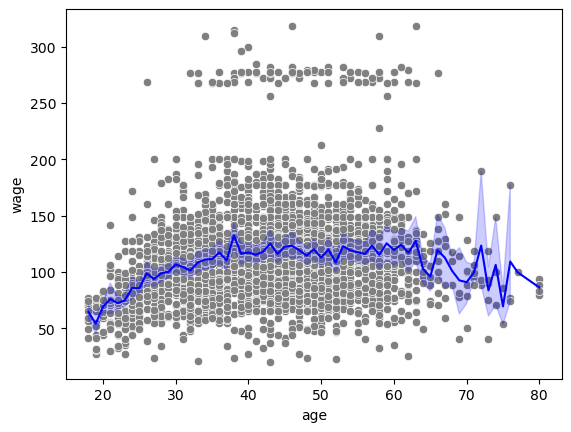

In [45]:
_ = plt.figure()
ax = plt.gca()
ax= sb.scatterplot(data=df_wage,x="age",y="wage", ax= ax, c="gray")
ax = sb.lineplot(data=df_wage, x="age",y="wage",estimator="mean",c='blue', ax=ax)

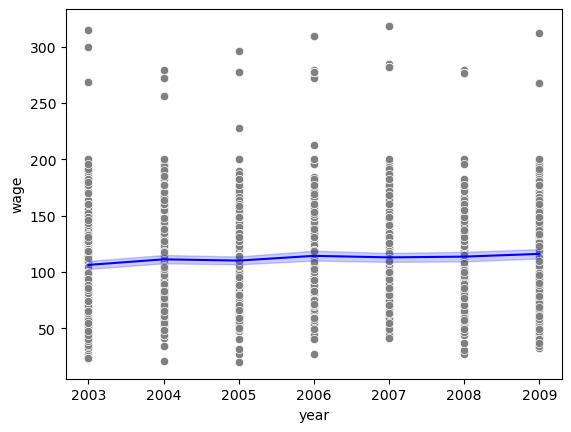

In [46]:
_ = plt.figure()
ax = plt.gca()
ax= sb.scatterplot(data=df_wage,x="year",y="wage", ax= ax, c="gray")
ax = sb.lineplot(data=df_wage, x="year",y="wage",estimator="mean",c='blue', ax=ax)

In [51]:
sorted(df_wage.education.unique())

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

<AxesSubplot:xlabel='education', ylabel='wage'>

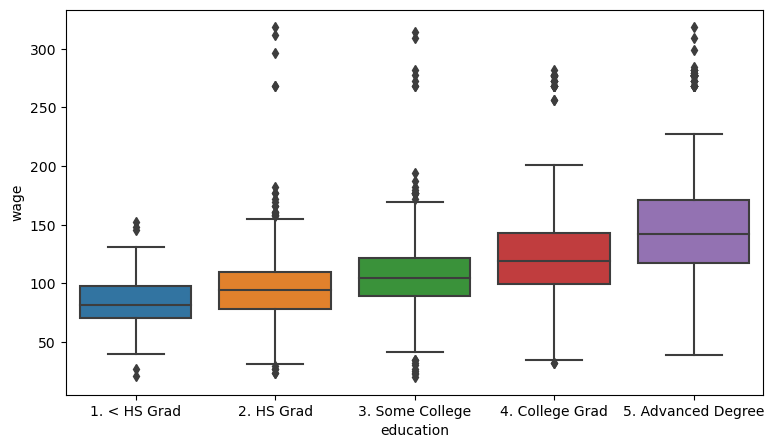

In [57]:
df_wage.education = pd.Categorical(df_wage.education,categories=sorted(df_wage.education.unique()),ordered=True)
_ = plt.figure(figsize=(9,5))
ax = plt.gca()
sb.boxplot(data=df_wage,x="education",y="wage")

### Smarket data

In [59]:
df_sm = pd.read_csv("../Notebooks/Data/Smarket.csv")